## Lista 3


In [165]:
import sympy as sp
from sympy import plot
from sympy.plotting import plot3d, plot3d_parametric_line
from sympy.calculus.util import continuous_domain

sp.init_printing()

x, y, ld = sp.symbols("x y lambda")

### Zadanie 1


In [166]:
fun_z = 4 - x**2 - y**2
fun_z

In [167]:
fun_y = 2 - x
fun_y = 2 - x
fun_y

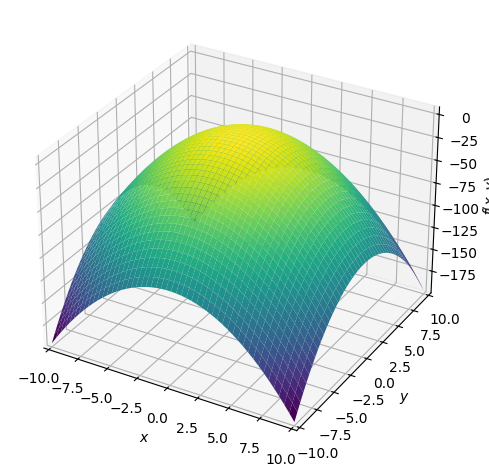

In [168]:
p1 = sp.plotting.plot3d(fun_z)

### I Sposób


In [169]:
fun_g = fun_y - y

In [170]:
fun_L = fun_z + ld * fun_g
fun_L

Wyznaczanie pochodnych pierwszego stopnia


In [171]:
fun_L_diff_x = sp.diff(fun_L, x)
print(fun_L_diff_x)
fun_L_diff_y = sp.diff(fun_L, y)
print(fun_L_diff_y)
fun_L_diff_lbda = sp.diff(fun_L, ld)

-lambda - 2*x
-lambda - 2*y


Wyznaczanie punktów krytycznych z warunku koniecznego


In [192]:
crit_point = sp.solve([fun_L_diff_x, fun_L_diff_y, fun_L_diff_lbda], [x, y, ld])
crit_point
p1 = crit_point
p1

In [173]:
L_hesjan = sp.Matrix(
    [
        [0, sp.diff(fun_g, x), sp.diff(fun_g, y)],
        [sp.diff(fun_g, x), sp.diff(fun_L, x, x), sp.diff(fun_L, x, y)],
        [sp.diff(fun_g, y), sp.diff(fun_L, y, x), sp.diff(fun_L, y, y)],
    ]
)
L_hesjan

⎡0   -1  -1⎤
⎢          ⎥
⎢-1  -2  0 ⎥
⎢          ⎥
⎣-1  0   -2⎦

In [174]:
delta_2 = L_hesjan.det()
delta_2

In [175]:
delta_2_p1 = delta_2.subs([(x, p1[x]), (y, p1[y])])
delta_2_p1

In [176]:
# wartość ekstremum w punkcie p1
f_p1 = fun_z.subs([(x, p1[x]), (y, p1[y])])
f_p1

Punkty to (1, 1) o wartości 2


### II Sposób


### III Sposób


### Zadanie 2


In [177]:
wzorFxy = 5 * x**4 - y**3 + 2 * x**2 * y - x**3 + 2 * y**2
# wzorFxy=x**5+4*y**3
wzorFxy

In [178]:
diff1x = sp.diff(wzorFxy, x)
diff1x

In [179]:
diff1x.subs({x: 1.11, y: 1.22})

In [180]:
diff1y = sp.diff(wzorFxy, y)
diff1y

In [181]:
diff1y.subs({x: 2.22, y: 2.11})

In [182]:
diff3xxx = sp.diff(wzorFxy, x, x, x)
diff3xxx

In [183]:
diff3xxx.subs({x: 3.33, y: 4.33})

In [184]:
diff3xxy = sp.diff(wzorFxy, x, x, y)
diff3xxy

In [185]:
diff3xxy.subs({x: 4.44, y: 3.44})

In [186]:
diff3yxy = sp.diff(wzorFxy, y, x, y)
diff3yxy

In [187]:
diff3yxy.subs({x: 3.33, y: 4.33})

In [188]:
diff3yyx = sp.diff(wzorFxy, y, y, x)
diff3yyx

In [189]:
diff3yyx.subs({x: 4.44, y: 3.44})

### Zadanie 3


In [190]:
from sympy import symbols, diff, hessian, Matrix

# Define the symbols
x, y = symbols("x y")

# Given function f(x,y)
f = 3 * x**4 - 2 * y**3 + 2 * x**2 * y - 2 * x**2 + y**2

# Partial derivatives
diff1x = diff(f, x)
diff1y = diff(f, y)
diff2xy = diff(diff1x, y)
# Correct third-order derivatives
diff3xxx = diff(diff1x, x)
diff3yyy = diff(diff1y, y)
diff3xxy = diff(diff1x, y, x)
diff3xyy = diff(diff2xy, y)
diff3yyx = diff(diff2xy, x)  # Use diff2xy instead of non-existent f_yx
diff3yxx = diff(diff1y, x, x)  # This was missing in your original code block

# Evaluate the partial derivatives at given points
points = [(1.11, 1.22), (2.22, 2.11), (3.33, 4.33), (4.44, 3.44)]
derivatives_at_points = {
    p: (
        diff1x.subs({x: p[0], y: p[1]}),
        diff1y.subs({x: p[0], y: p[1]}),
        diff2xy.subs({x: p[0], y: p[1]}),
        diff3xxx.subs({x: p[0], y: p[1]}),
        diff3yyy.subs({x: p[0], y: p[1]}),
        diff3xxy.subs({x: p[0], y: p[1]}),
        diff3xyy.subs({x: p[0], y: p[1]}),
        diff3yyx.subs({x: p[0], y: p[1]}),
        diff3yxx.subs({x: p[0], y: p[1]}),
    )
    for p in points
}

# Find the Hessian matrix at point P
P = (0, 0)
H = hessian(f, (x, y))

# Calculate the determinant of the Hessian matrix at P
det_H_P = H.subs({x: P[0], y: P[1]}).det()

# Equation of the tangent plane at point M
M = (1, 1)
gradient_f_M = Matrix(
    [diff1x.subs({x: M[0], y: M[1]}), diff1y.subs({x: M[0], y: M[1]})]
)
plane_eq = gradient_f_M.dot(Matrix([x - M[0], y - M[1]])) - f.subs({x: M[0], y: M[1]})

# Directional derivative at point M in direction a
a = Matrix([1, 2])
directional_derivative = gradient_f_M.dot(a)

# Output the results
for point, values in derivatives_at_points.items():
    print(
        f"Derivatives at point {point}: diff1x={values[0]}, diff1y={values[1]}, diff2xy={values[2]}, diff3xxx={values[3]}, diff3yyy={values[4]}, diff3xxy={values[5]}, diff3xyy={values[6]}, diff3yyx={values[7]}, diff3yxx={values[8]}"
    )

print(f"Determinant of the Hessian matrix at P: {det_H_P}")
print(f"Equation of the tangent plane at M: {plane_eq}")
print(f"Directional derivative at M in direction a: {directional_derivative}")

Derivatives at point (1.11, 1.22): diff1x=17.3883720000000, diff1y=-4.02620000000000, diff2xy=4.44000000000000, diff3xxx=45.2356000000000, diff3yyy=-12.6400000000000, diff3xxy=4, diff3xyy=0, diff3yyx=4, diff3yxx=4
Derivatives at point (2.22, 2.11): diff1x=141.149376000000, diff1y=-12.6358000000000, diff2xy=8.88000000000000, diff3xxx=181.862400000000, diff3yyy=-23.3200000000000, diff3xxy=4, diff3xyy=0, diff3yyx=4, diff3yxx=4
Derivatives at point (3.33, 4.33): diff1x=487.468044000000, diff1y=-81.6556000000000, diff2xy=13.3200000000000, diff3xxx=412.520400000000, diff3yyy=-49.9600000000000, diff3xxy=4, diff3xyy=0, diff3yyx=4, diff3yxx=4
Derivatives at point (4.44, 3.44): diff1x=1093.67500800000, diff1y=-24.6944000000000, diff2xy=17.7600000000000, diff3xxx=719.449600000000, diff3yyy=-39.2800000000000, diff3xxy=4, diff3xyy=0, diff3yyx=4, diff3yxx=4
Determinant of the Hessian matrix at P: -8
Equation of the tangent plane at M: 12*x - 2*y - 12
Directional derivative at M in direction a: 8


### Zadanie 4


### Zadanie 5


In [191]:
from sympy import symbols, diff, sqrt

# Definicja zmiennych symbolicznych
x, y = symbols("x y")

# Definicja funkcji f(x, y)
f = 3 * x**4 - (2 / 3) * y**3 + 2 * x**2 * y - 2 * x**2 + y**2

# Obliczanie pochodnych cząstkowych
df_dx = diff(f, x)
df_dy = diff(f, y)

# Wartości pochodnych cząstkowych w punkcie M=(2,3)
df_dx_at_M = df_dx.subs({x: 2, y: 3})
df_dy_at_M = df_dy.subs({x: 2, y: 3})

# Wyświetlenie gradientu
print("Gradient funkcji f w punkcie M=(2,3):")
print("[{}, {}]".format(df_dx_at_M, df_dy_at_M))

# Obliczanie długości wektora v=[1,2]
v = [1, 2]
v_length = sqrt(v[0] ** 2 + v[1] ** 2)

# Obliczanie pochodnej kierunkowej
f_prime_at_M = df_dx_at_M * (v[0] / v_length) + df_dy_at_M * (v[1] / v_length)

print("Pochodna kierunkowa funkcji f w kierunku wektora v=[1,2]:")
print(f_prime_at_M)

Gradient funkcji f w punkcie M=(2,3):
[112, -4.00000000000000]
Pochodna kierunkowa funkcji f w kierunku wektora v=[1,2]:
20.8*sqrt(5)
